<h1>Importing Necessary Files</h1>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

<hr>
<h1>Making a DataFrame for the Dataset</h1>

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

<hr>
<h1>Checking if the DataFrame is Working</h1>

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Cleaning the Inconsistencies on the Accident date</h1>

In [4]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

<h1>Coverting the Data Type of the Accident Date</h1>

In [5]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')

<h1>Extracting New Columns from Accident Date</h1>

In [6]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month_Number'] = accident['Accident Date'].dt.month
accident['Month'] = accident['Accident Date'].dt.month_name()
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek  # Monday=0, Sunday=6

<hr>
<h1>Checking for Null Values</h1>

In [7]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month_Number                   0
Month                          0
Day                            0
DayofWeek                      0
dtype: int64

<h1>Fixing the Null Values</h1>

<h3>Numerical Null Values</h3>

In [8]:
accident['Latitude'].mean()

np.float64(52.553865761110956)

In [9]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())

In [10]:
accident['Longitude'].mean()

np.float64(-1.4312103685020727)

In [11]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())

<h3>-Categorical Null Values-</h3>

In [12]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')

In [13]:
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')

In [14]:
accident['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: object

In [15]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [16]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

<h1>Checking if there are still Null Values</h1>

In [17]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month_Number               0
Month                      0
Day                        0
DayofWeek                  0
dtype: int64

<hr>
<h1>Checking the Data Type</h1>

In [18]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h1>Fixing the Data Type</h1>

In [19]:
accident['Index'] = accident['Index'].astype('category') 
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category') 
accident['Road_Type'] = accident['Road_Type'].astype('category') 
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category') 
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category') 
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Month'] = accident['Month'].astype('category')
accident['Year'] = accident['Year'].astype('category')

<h1>Checking again</h1>

In [20]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<hr>
<h1> Questions and Insights</h1>
<hr>

<h1>EDA</h1>

<h1>1.Which kind of vehicle is the most common?</h1>

In [70]:
accident['Vehicle_Type'].mode()


0    Car
Name: Vehicle_Type, dtype: category
Categories (16, object): ['Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car', 'Data missing or out of range', ..., 'Pedal cycle', 'Ridden horse', 'Taxi/Private hire car', 'Van / Goods 3.5 tonnes mgw or under']

<h2><strong>Insight: </strong> The results show that cars are the most common and frequent type of vehicle involved in accidents..</h2>

<hr>
<h1>2. What is the usual light condition during the accidents?</h1>

In [71]:
accident['Light_Conditions'].mode()


0    Daylight
Name: Light_Conditions, dtype: category
Categories (5, object): ['Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight']

<h2> <strong>Insight: </strong> The findings indicate that accidents typically occur during the day.. </h2>

<hr>
<h1>3. In terms of road surface conditions, what is the the most frequent?</h1>

In [23]:
accident['Road_Surface_Conditions'].mode()

0    Dry
Name: Road_Surface_Conditions, dtype: category
Categories (6, object): ['Dry', 'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp', 'unaccounted']

<h2> <strong>Insight: </strong> 
    Based on the result, dry road surface condition is prone to accidents. </h2>

<hr>
<h1>4. How many number of vehicles are mostly being involved during accidents?</h1>

In [60]:
accident['Number_of_Vehicles'].mode()

0    2
Name: Number_of_Vehicles, dtype: int64

<h2> <strong>Insight: </strong> Based on the result, two vehicle are most involved in accidents </h2>

<hr>
<h1>5. What type of road does the accidents usually happen? </h1>

In [72]:
accident['Road_Type'].mode()

0    Single carriageway
Name: Road_Type, dtype: category
Categories (6, object): ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road', 'unaccounted']

<h2> <strong>Insight: </strong> According to the result, accidents usually happen on a single carriageway road. </h2>

<h1>6. How many record of accidents per year?</h1>

In [73]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h2> <strong>Insight: </strong> The results indicate that, with 182,115 incidents, 2019 has the greatest accident record. With 170,591 recordings, 2020 is the second-highest year. With 163,554 records, 2021 comes next. In contrast, 2022 had the fewest records (144,419).
 </h2>

<h1>7. In terms of weather conditions, when does the least and most accidents record?</h1>

In [27]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2> <strong>Insight: </strong> Based on the result, accidents usually happen during 'fine no high winds' weather condition, then the least accident record happens during 'snowing + high winds'.</h2>

<h1>AGGREGATION</h1>

<h1>8. How many accidents occur on each type of road overall??</h1>

In [28]:
accident.groupby('Road_Type').size()

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    492143
Slip road               7041
unaccounted             4520
dtype: int64

<h2> <strong>Insight: </strong>The results show that, with 496,663 records, single carriageways were the road type with the most accidents. Dual Carriageway, with 99,424 records, came next. The roundabout came in third place with 43,992 accident reports, followed by the one-way street with 13,559 recordings and the slip road with 7,041 records. </h2>

<h1>9. How many people are killed in accidents on average, broken down by the severity of the accident?</h1>

In [29]:
accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2> <strong>Insight: </strong> The average of accident severity in terms of fatal is 1.903129 (highest), serious is 1.467280, and slight is 1.331402 (lowest). </h2>

<h1>10. How do accident severities vary across different light conditions?</h1>

In [30]:
accident.groupby(['Accident_Severity', 'Light_Conditions']).size().unstack()

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Severity,,,,,
Fatal,68,1860,45,1612,5076
Serious,794,19130,360,7174,60759
Slight,5622,108345,2138,28651,419045


<h2> <strong>Insight: </strong> We can conclude that all the three types of accident severity happens the most during the daylight, while the three of them also happens the least during darkness - lights unlit.  </h2>

<h1>11. What is the distribution of accidents by road type and road surface condition?</h1>

In [31]:
accident.groupby(['Road_Type', 'Road_Surface_Conditions']).size().unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,unaccounted
Road_Type,,,,,,
Dual carriageway,66205,302,2408,909,29533,67
One way street,10068,5,183,76,3195,32
Roundabout,30698,22,745,232,12209,86
Single carriageway,332698,672,14918,4585,138743,527
Slip road,4714,9,178,60,2074,6
unaccounted,3438,7,85,28,954,8


<h2> <strong>Insight: </strong> The result shows that all of the road types had the same highest number of accidents in terms of road surface conditions which is dry, they also had the same least number of accidents which is flood over 3cm. deep (road surface condition).  </h2>

<h1>12. What type of area does accidents happen the most?</h1>

In [32]:
accident.groupby('Urban_or_Rural_Area').size()

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
dtype: int64

<h2> <strong>Insight: </strong> According to the result, accidents usually happen at urban areas. </h2>

<h1>13. What month does accidents usually happens?</h1>

In [33]:
accident.groupby('Month').size()

Month
April        51744
August       53913
December     51836
February     49491
January      52872
July         57445
June         56481
March        54086
May          56352
November     60424
October      59580
September    56455
dtype: int64

<h2> <strong>Insight: </strong> The result shows that accidents usually happen during the month of November.
</h2>

<h1>14. What is the distribution of accidents by accident severity and vehicle type?</h1>

In [34]:
accident.groupby(['Accident_Severity','Vehicle_Type']).size().unstack()

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Accident_Severity,,,,,,,,,,,,,,,,
Fatal,21,325,6577,0,216,67,29,189,95,105,339,70,6,0,155,467
Serious,282,3373,66461,0,2321,857,276,2031,1014,1014,3457,767,39,0,1771,4554
Slight,1644,22180,424954,6,14770,5172,1671,13049,6494,6537,21861,4800,152,4,11368,29139


<h2> <strong>Insight: </strong> According to the result, car is the vehicle type that got the highest accident of all the three types of accident severity, while ridden horse has the least. </h2>

<h1>~Correlation~</h1>

<h1>15. Is there a correlation between the number of casualties and number of vehicles?</h1>

In [35]:
accident['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])

np.float64(0.2288888612692756)

<h2> <strong>Insight: </strong> The result shows that number of casualties and number of vehicles has no correlation.</h2>

<h1>16. Is there a correlation betweem latitude number of casualties?</h1>

In [36]:
accident['Latitude'].corr(accident['Number_of_Casualties'])

np.float64(0.032200686625906395)

<h2> <strong>Insight: </strong> Based on the result, there is no correlation between laltitude and number of casualties. </h2>

<h1>17. Is there a correlation between longitude and number of casualties?</h1>

In [37]:
accident['Longitude'].corr(accident['Number_of_Casualties'])

np.float64(-0.0404056457884545)

<h2> <strong>Insight: </strong> The result shows that there is no correlation between longitude and number of casualties.</h2>

<h1>18. Is there a significant difference between accident severity and number of vehicles?</h1>

In [74]:
accident['Accident_Severity'].unique()

['Serious', 'Slight', 'Fatal']
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [75]:
vehiserious = accident[accident['Accident_Severity'] == 'Serious']['Number_of_Vehicles']
vehislight = accident[accident['Accident_Severity'] == 'Slight']['Number_of_Vehicles']
vehifatal = accident[accident['Accident_Severity'] == 'Fatal']['Number_of_Vehicles']

In [76]:
result, pvalue = f_oneway(vehiserious, vehislight, vehifatal)
pvalue

np.float64(0.0)

<h2> <strong>Insight: </strong>The result shows that there is extremely significance between the accident severity and number of vehicles, it shows that they are very related to each other.</h2>


<h1>19. Is there a significant difference between the area and number of casualties?</h1>

In [77]:
accident['Urban_or_Rural_Area'].unique()

['Urban', 'Rural', 'Unallocated']
Categories (3, object): ['Rural', 'Unallocated', 'Urban']

In [78]:
urbancasualty = accident[accident['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties']
ruralcasualty = accident[accident['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties']
unallocatedcasualty = accident[accident['Urban_or_Rural_Area'] == 'Unallocated']['Number_of_Casualties']

In [79]:
result, pvalue = f_oneway(urbancasualty, ruralcasualty, unallocatedcasualty)
pvalue

np.float64(0.0)

<h2> <strong>Insight: </strong> According to the result, there is a significant difference between the areas and the number of casualties. </h2>

<h1>20. Is there a significant difference between light conditions and latitude?</h1>

In [80]:
accident['Light_Conditions'].unique()

['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Darkness - no lighting']
Categories (5, object): ['Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight']

In [81]:
lighta = accident[accident['Light_Conditions'] == 'Darkness - lights lit']['Latitude']
lightb = accident[accident['Light_Conditions'] == 'Daylight']['Latitude']
lightc = accident[accident['Light_Conditions'] == 'Darkness - lighting unknown']['Latitude']
lightd = accident[accident['Light_Conditions'] == 'Darkness - lights unlit']['Latitude']
lighte = accident[accident['Light_Conditions'] == 'Darkness - no lighting']['Latitude']

In [82]:
result, pvalue = f_oneway(lighta, lightb, lightc, lightd, lighte)
pvalue

np.float64(1.224998791423201e-27)

<h2> <strong>Insight: </strong> The result shows that the difference between light conditions and latitude is very significant, mean the light conditions has an extreme effect on the latitude. </h2>

<hr>
<h1>ADDITIONAL FIVE QUESTIONS ABOUT ACCIDENT DATE</h1>

<h2>UniVariate</h2>

<h1>21. Which day of the week had the most accidents record?</h1>

In [47]:
accident['DayofWeek'].value_counts()

DayofWeek
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

<h2> <strong>Insight: </strong> Based on the result, accidents mostly occurs on Saturday, and accidents happen the least during Mondays. </h2>

<h2>BiVariate</h2>

<h1>22. What is the number of accidents per month in each year?</h1>

In [48]:
accidentpermonth = accident.groupby(['Month', 'Year']).size()
accidentpermonth.unstack()

Year,2019,2020,2021,2022
Month,,,,
April,14125,13394,12715,11510
August,15044,13366,13415,12088
December,14708,13794,13709,9625
February,13253,14353,10950,10935
January,15355,14133,13417,9967
July,15862,14630,14300,12653
June,15528,14205,13936,12812
March,15049,13494,13202,12341
May,15833,14336,13811,12372


<h2> <strong>Insight 1: </strong> According to their percentage equivalency, November consistently has the highest accident rate in all four years, with two consecutive years having rates above 9% (2021 and 2022). Although October also has a high percentage with three ratings of 9% or above, November often outperforms it by a small margin.</h2>
<h2> <strong>Insight 2: </strong> <strong>February has the lowest percentage</strong> of accidents especially 2021 at just <strong>6.7%.</strong> It suggests that road accidents tend to be more common in October, while February is generally a safer month./h2>
<h2> <strong>Insight 3: </strong>Most of the months had high road accident rate on the year 2019, and we could see from the numbers that on the years 2020-2022, the number had decreased and we can conclude that this is  perhaps because of the pandemic. </h2>

<h1>23. What is the state of accident severity across years?</h1>

In [49]:
accident.groupby(['Accident_Severity', 'Year']).size().unstack()

Year,2019,2020,2021,2022
Accident_Severity,,,,
Fatal,2714,2341,2057,1549
Serious,24322,23121,21997,18777
Slight,155079,145129,139500,124093


<h2> <strong>Insight 1: </strong> From the number itself, it shows that deadly crashes are rare compared to other types of accident severity. <strong>Fatal accidents are only around 1% of all cases.</strong> They even decreased slightly over the years, from 1.49% in 2019 down to 1.07% in 2022.</h2>
<h2> <strong>Insight 2: </strong> On the other hand, <strong>slight accidents had the highest consistent record at around 85% every year</strong>.<</h2>
<h2> <strong>Insight 3: </strong> <strong>Seious accidents</strong> are in the middle of the percentage, <strong>staying between 13–14%</strong>.</h2>
<h2> <strong>Insight 4: </strong> Accidents across the years were slight and less harmful, a small portion are serious, and very few cases are fatal.</h2>

<h2>-MultiVariate-</h2>

<h1>24. What is the average casualties per month, year, and road surface conditions?</h1>

In [83]:
accident.groupby(['Month', 'Year', 'Road_Surface_Conditions'])['Number_of_Casualties'].mean().unstack()

Road_Surface_Conditions       Dry  Flood over 3cm. deep  Frost or ice  \
Month     Year                                                          
April     2019           1.360358              1.000000      1.200000   
          2020           1.339197              1.538462      1.560606   
          2021           1.353704              1.000000      1.000000   
          2022           1.357578              1.000000      1.500000   
August    2019           1.383017              1.636364      1.000000   
          2020           1.375027              1.578947      1.000000   
          2021           1.385929              2.090909           NaN   
          2022           1.379569              1.750000      1.500000   
December  2019           1.286649              1.531915      1.350850   
          2020           1.335708              1.708333      1.345857   
          2021           1.274566              1.500000      1.380342   
          2022           1.297656              1.600000      1.385561   
February  2019           1.315298              1.083333      1.287305   
          2020           1.318313              1.600000      1.346648   
          2021           1.326901              1.176471      1.364519   
          2022           1.325941              1.714286      1.317593   
January   2019           1.301965              1.358974      1.331887   
          2020           1.305425              1.515625      1.308008   
          2021           1.331680              1.333333      1.315061   
          2022           1.285207              1.111111      1.336806   
July      2019           1.342417              1.538462      1.000000   
          2020           1.324689              1.583333      1.000000   
          2021           1.340411              1.444444      1.000000   
          2022           1.339222              1.750000      1.000000   
June      2019           1.336180              1.506667      1.000000   
          2020           1.333754              1.166667      1.000000   
          2021           1.329111              1.555556           NaN   
          2022           1.339122              2.000000      1.000000   
March     2019           1.330359              1.294118      1.231579   
          2020           1.333562              1.352941      1.452555   
          2021           1.334661              1.200000      1.346939   
          2022           1.325219              1.333333      1.246914   
May       2019           1.346532              1.684211      1.000000   
          2020           1.337205              1.400000      1.500000   
          2021           1.354493              1.666667      1.500000   
          2022           1.338688              1.250000      1.333333   
November  2019           1.290865              1.260870      1.369295   
          2020           1.300952              1.583333      1.434132   
          2021           1.294445              1.452381      1.243243   
          2022           1.318023              1.444444      1.356423   
October   2019           1.330498              1.272727      1.400000   
          2020           1.314318              1.518519      1.347150   
          2021           1.324756              1.533333      2.200000   
          2022           1.336587              1.705882      1.188679   
September 2019           1.339429              1.250000      1.000000   
          2020           1.323790              1.509804      1.000000   
          2021           1.328964              2.111111           NaN   
          2022           1.332019              1.400000      1.000000   

Road_Surface_Conditions      Snow  Wet or damp  unaccounted  
Month     Year                                               
April     2019                NaN     1.385888     1.000000  
          2020           1.442308     1.442780     1.000000  
          2021           2.000000     1.420137     1.181818  
          2022           1.250000     1

<h2> <strong>Insight 1: </strong> The <strong>average casualties are slightly higher on wet/damp roads (around 1.40–1.47)</strong> compared to dry roads (around 1.30–1.36) across almost months and years. </h2>
<h2> <strong>Insight 2: </strong> The <strong>"Flood over 3cm deep" condition</strong> often shows averages <strong>above 1.5 and sometimes above 2.0</strong> casualties per accident. </h2>
<h2> <strong></strong> Averages of <strong>frost/ice and snow condition varies</strong>frost/ice and snow condition varies a lot, both of them has usually around <strong>1.0</strong> average but there are times that it spikes to above <strong>2.0</strong> (October 2021 has the highest value with 2.2). </h2>
<h2> <strong>Insight 4: </strong> Most accidents happen on dry roads but accidents on wet and flooded roads are a bit more dangerous. Snow and ice road surface condition tend to happen less frequent but it is the most dangerous and causes more casualties when they do happen. </h2>

<h1>25. What is the distribution of accidents by year, month, and rural/urban area?</h1>

In [84]:
accident.groupby(['Urban_or_Rural_Area','Year', 'Month']).size().unstack()

Month                     April  August  December  February  January  July  \
Urban_or_Rural_Area Year                                                     
Rural               2019   5169    6001      5499      4874     5807  6047   
                    2020   4752    5204      5167      5226     5182  5415   
                    2021   4555    5256      5106      4144     4925  5277   
                    2022   3956    4537      3589      3896     3626  4476   
Unallocated         2019      0       0         2         0        1     1   
                    2020      1       0         1         0        0     0   
                    2021      0       0         0         0        0     0   
                    2022      0       0         0         0        0     0   
Urban               2019   8956    9043      9207      8379     9547  9814   
                    2020   8641    8162      8626      9127     8951  9215   
                    2021   8160    8159      8603      6806     8492  9023   
                    2022   7554    7551      6036      7039     6341  8177   

Month                     June  March    May  November  October  September  
Urban_or_Rural_Area Year                                                    
Rural               2019  5835   5350   5802      5974     5518       5682  
                    2020  5105   4947   5184      5251     5415       5143  
                    2021  4943   4391   4873      5456     5260       4830  
                    2022  4317   4118   4266      4671     4593       4380  
Unallocated         2019     1      0      0         0        0          0  
                    2020     1      1      2         0        0          0  
                    2021     0      0      0         0        0          0  
                    2022     0      0      0         0        0          0  
Urban               2019  9692   9699  10031     10585    10010       9589  
                    2020  9099   8546   9150      9519    10269       9289  
                    2021  8993   8811   8938     10017     9574       8962  
                    2022  8495   8223   8106      8951     8941       8580

<h2> <strong>Insight 1: </strong> In all months and years, accidents mostly happens in <strong>urban areas at 76%-80%.</strong> While accidents in <strong>rural areas are lower with 19%-23%.</strong></h2>
<h2> <strong>Insight 2: </strong> The highest percentage in <strong>urban areas</strong> was in <strong>November 2021 at 80.16%</strong>, followed by both September 2021 and October 2020 at 80.15%. While the <strong>lowest was April 2019 (76.56%).</strong></i></h2>
<h2> <strong>Insight 3: </strong> In <strong>rural areas</strong>, the lowest percentage was <strong>19.84%</strong> on November 2021, while the highest was on April 2019 at <strong>23.44%.</strong></h2>
<h2> <strong>Insight 4: </strong> Most accidents happen in urban areas (cities) regardless of the month and year. Rural accidents are fewer but the still have a peak month (April).</h2>

<hr>
<h1>Trying Matplotlib</h1>

In [53]:
district = accident.groupby(['Year', 'District Area']).size().unstack()
# district.plot(kind='bar', figsize=(15, 7))
district

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


<Axes: xlabel='Year'>

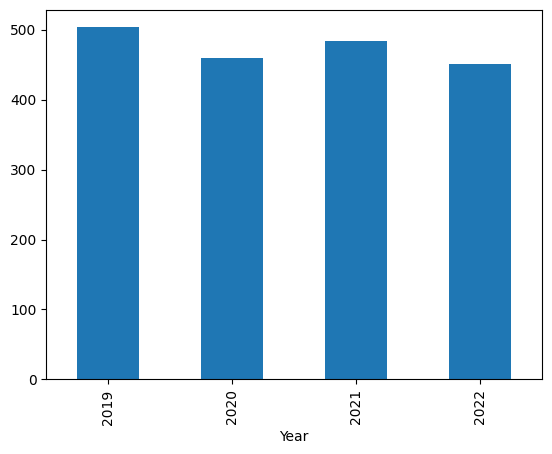

In [57]:
york = accident[accident['District Area'] == 'York']
york.groupby('Year').size().plot(kind='bar')

In [55]:
york = accident[accident['District Area'] == 'York']
york.groupby('Year').size()

Year
2019    503
2020    459
2021    484
2022    451
dtype: int64

Year  Accident_Severity
2019  Fatal                Axes(0.125,0.11;0.775x0.77)
      Serious              Axes(0.125,0.11;0.775x0.77)
      Slight               Axes(0.125,0.11;0.775x0.77)
2020  Fatal                Axes(0.125,0.11;0.775x0.77)
      Serious              Axes(0.125,0.11;0.775x0.77)
      Slight               Axes(0.125,0.11;0.775x0.77)
2021  Fatal                Axes(0.125,0.11;0.775x0.77)
      Serious              Axes(0.125,0.11;0.775x0.77)
      Slight               Axes(0.125,0.11;0.775x0.77)
2022  Fatal                Axes(0.125,0.11;0.775x0.77)
      Serious              Axes(0.125,0.11;0.775x0.77)
      Slight               Axes(0.125,0.11;0.775x0.77)
dtype: object

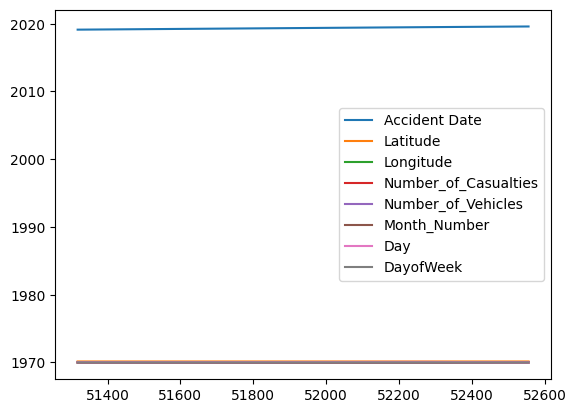

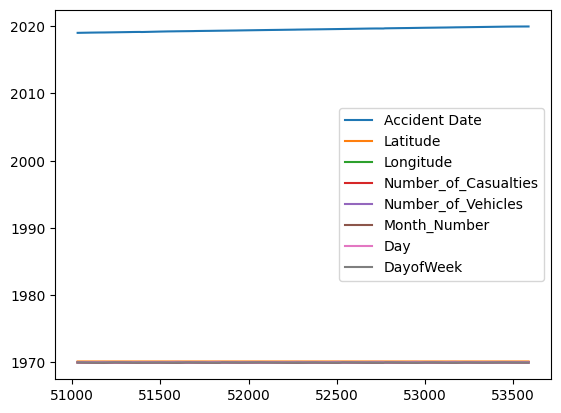

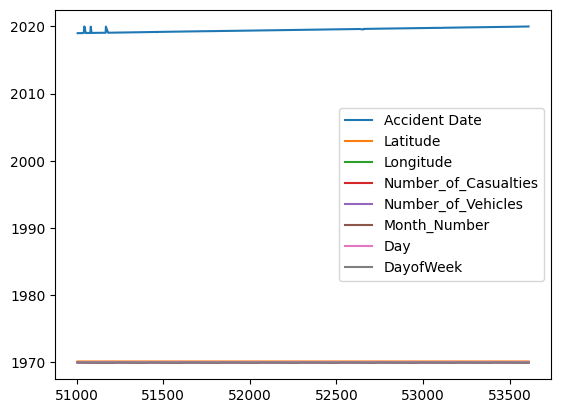

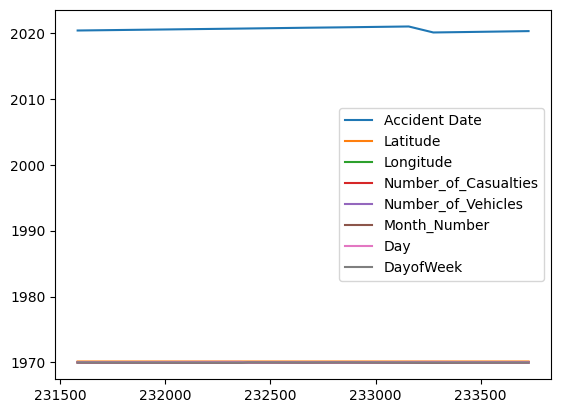

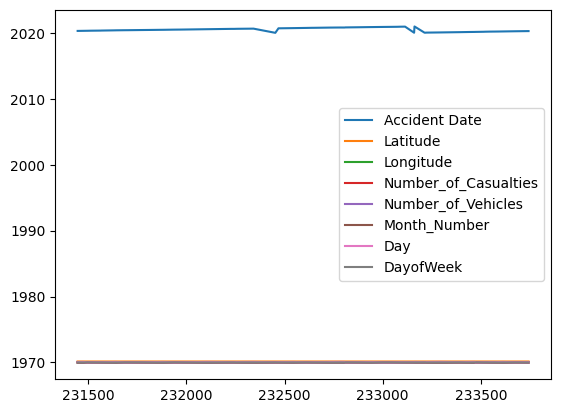

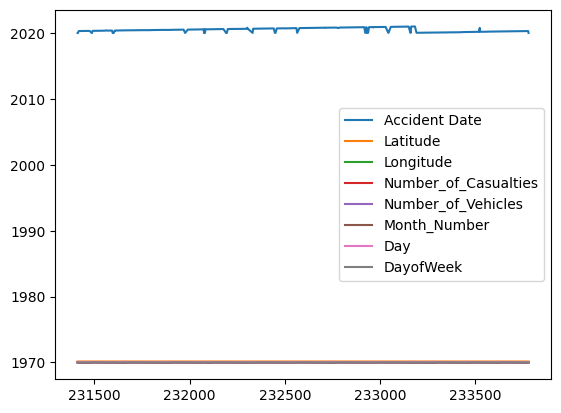

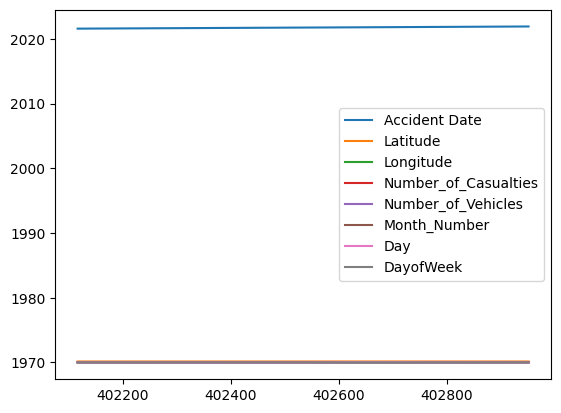

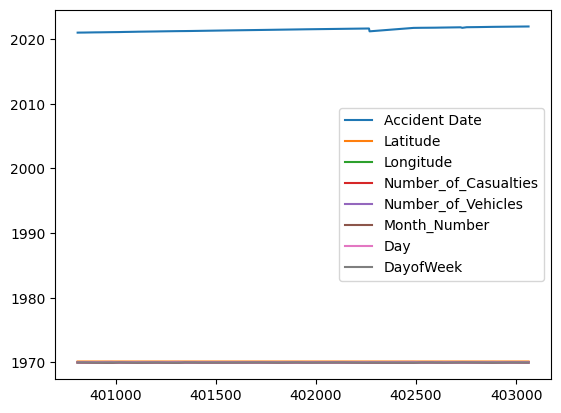

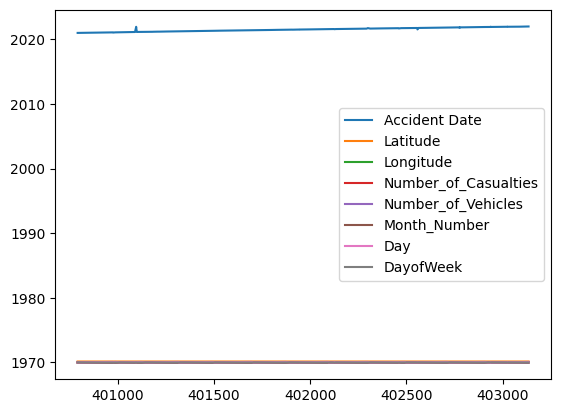

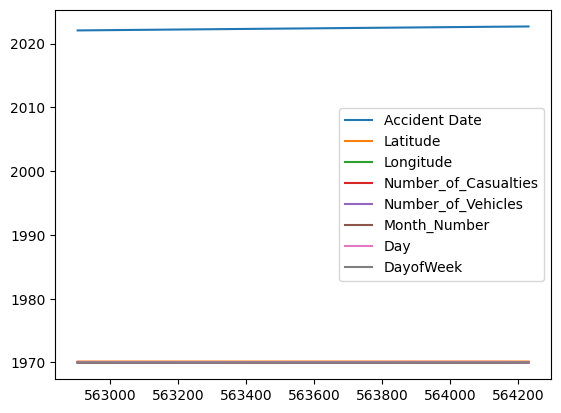

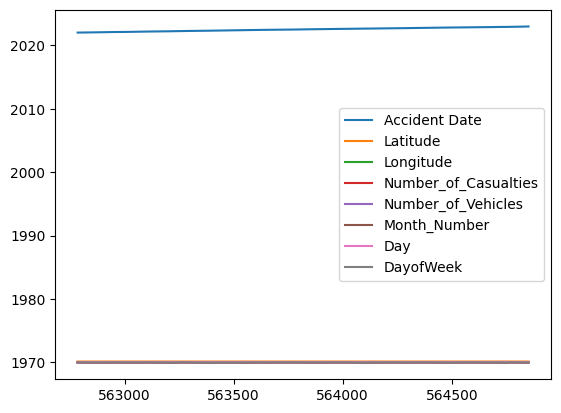

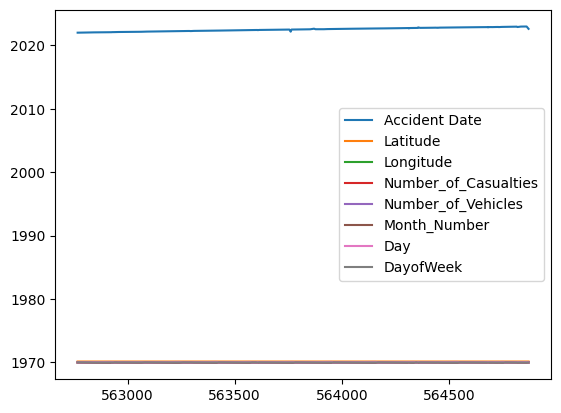

In [56]:
york.groupby(['Year', 'Accident_Severity']).plot()